In [1]:
from NetworkSpace import SIR_Network_Model, State
import networkx as nx
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
sir_model = SIR_Network_Model()

cmap = {State.infected: 'r', State.susceptible: 'g', State.resistant:'k'}
pos = nx.spring_layout(sir_model.network.graph)

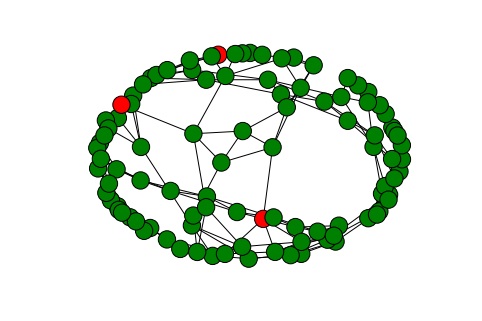

In [3]:
pos = nx.spring_layout(sir_model.network.graph)
colors = list(map(lambda x: cmap[x.state], sir_model.network.graph.nodes()))
nx.draw(sir_model.network.graph,pos,node_color=colors,cmap=plt.cm.get_cmap("Dark2"))

In [4]:
from IPython import display
import time

for i in range(40):
    sir_model.step()
    colors = list(map(lambda x: cmap[x.state], sir_model.network.graph.nodes()))
    nx.draw(sir_model.network.graph,pos,node_color=colors,cmap=plt.cm.get_cmap("Dark2"))
    plt.show()
    #input("Press Enter to continue...")
    time.sleep(0.2)
    display.clear_output(wait=True)
    display.display(plt.gcf())    

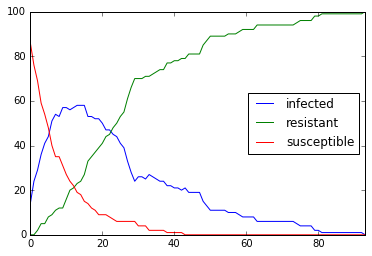

In [5]:
sir_model.run_model()
results = sir_model.dc.get_model_vars_dataframe()
results.plot()